In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from gaussian_process import GaussianProcessDistillation
from gaussian_process.kernels import RBF
from gaussian_process.datasets import generate_gp

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


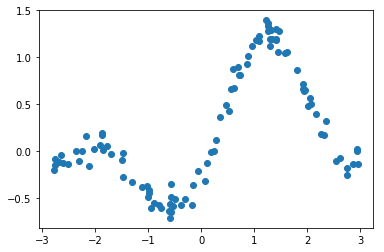

In [3]:
X, s = generate_gp(n_samples=100, random_state=6)
y = np.sign(s)
Xtrain, Xtest, ytrain, ytest, strain, stest = train_test_split(X, y, s, train_size=0.5, random_state=0)
plt.plot(X, s, "o")

In [4]:
gpd = GaussianProcessDistillation(cov=RBF(1, 1), sigma=0.01, rho=1.)
gpd.fit(Xtrain, ytrain, strain)

0.88


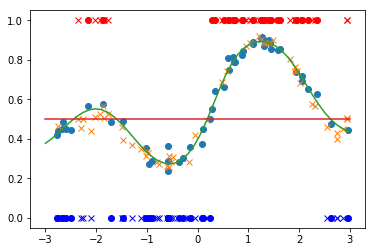

In [5]:
Xgrid = np.linspace(-3, 3).reshape(-1, 1)
fgrid, vgrid = gpd.posterior(Xgrid)
plt.plot(Xtrain, norm.cdf(strain), "o")
plt.plot(Xtest, norm.cdf(stest), "x")
plt.plot(Xgrid, norm.cdf(fgrid))
plt.plot(Xtrain[ytrain > 0], np.ones(np.count_nonzero(ytrain > 0)), "ro")
plt.plot(Xtrain[ytrain < 0], np.zeros(np.count_nonzero(ytrain < 0)), "bo")
plt.plot(Xtest[ytest > 0], np.ones(np.count_nonzero(ytest > 0)), "rx")
plt.plot(Xtest[ytest < 0], np.zeros(np.count_nonzero(ytest < 0)), "bx")
plt.plot(Xgrid, 0.5*np.ones(len(Xgrid)))
print(gpd.score(Xtest, ytest))

0.78


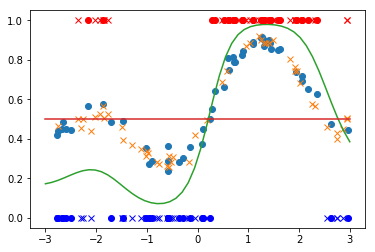

In [6]:
gpd.set_params(rho=0)
gpd.fit(Xtrain, ytrain, strain)
fgrid, vgrid = gpd.posterior(Xgrid)
plt.plot(Xtrain, norm.cdf(strain), "o")
plt.plot(Xtest, norm.cdf(stest), "x")
plt.plot(Xgrid, norm.cdf(fgrid))
plt.plot(Xtrain[ytrain > 0], np.ones(np.count_nonzero(ytrain > 0)), "ro")
plt.plot(Xtrain[ytrain < 0], np.zeros(np.count_nonzero(ytrain < 0)), "bo")
plt.plot(Xtest[ytest > 0], np.ones(np.count_nonzero(ytest > 0)), "rx")
plt.plot(Xtest[ytest < 0], np.zeros(np.count_nonzero(ytest < 0)), "bx")
plt.plot(Xgrid, 0.5*np.ones(len(Xgrid)))
print(gpd.score(Xtest, ytest))